1. 从MNIST的训练数据的0-9数字中各选择前100个，组成1000个数字的新训练集trainX1k。
2. 使⽤和示例1中相同的训练模型，⽤trainX1k和trainX（6000个数字的训练集）各训练
50epochs，⽐较⼆者的差别，并分析原因。
3. 在TensorBoard中绘制⼆者的训练和测试过程数据曲线

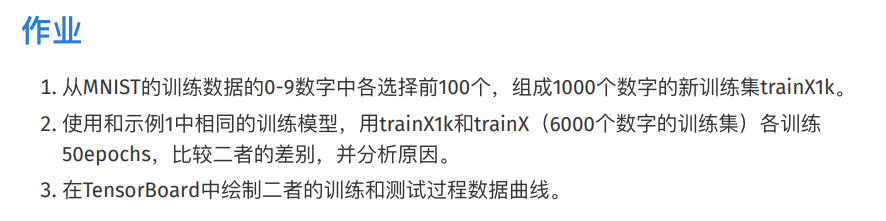

### 1.导入数据

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [11]:
x_train.shape

(60000, 28, 28)

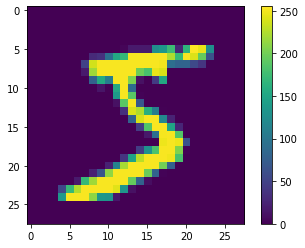

In [3]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
np.where(y_train==1)[0]
np.where(y_train==1)

(array([    3,     6,     8, ..., 59979, 59984, 59994], dtype=int64),)

In [5]:
'''1000个数字的新训练集'''
train1k=[]
for i in range(10):
    idx_i=np.where(y_train==i)[0]
    idx_list=idx_i[:100]
    # print(idx_list)
    for idx in idx_list:
        train1k.append((x_train[idx],y_train[idx]))
        #print(train1k)
    
np.random.shuffle(train1k)
# for x in train1k:
#     print(x[1])
trainX1k=[x[0] for x in train1k]
trainy1k=[x[1] for x in train1k]
trainX1k=np.array(trainX1k)
trainy1k=np.array(trainy1k)
trainX1k.shape

(1000, 28, 28)

In [6]:
'''6000个数字的新训练集'''
train=[]
for i in range(10):
    idx_i=np.where(y_train==i)[0]
    idx_list=idx_i[:600]
    for idx in idx_list:
        train.append((x_train[idx],y_train[idx]))
        #print(train1k)
    
np.random.shuffle(train)

trainX=[x[0] for x in train]
trainy=[x[1] for x in train]
trainX=np.array(trainX)
trainy=np.array(trainy)
# trainX.shape

### 2.可视化

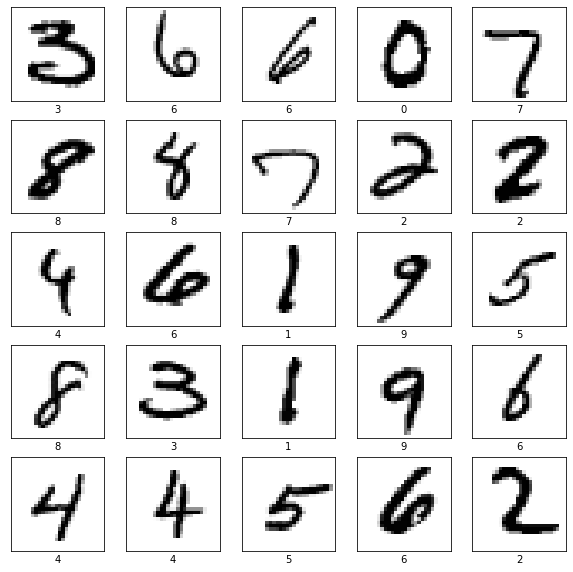

In [7]:
plt.figure(figsize=(10,10))
# class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX1k[i], cmap=plt.cm.binary)
    plt.xlabel(trainy1k[i])
plt.show()

### 3.归一化

In [8]:
'''将像素值除以255是为了将图像的灰度值范围从0到255转换到0到1之间的范围'''
trainX1k, trainX, x_test = trainX1k / 255.0, trainX / 255.0, x_test / 255.0
x_train=x_train/255.0

### 4.构建模型

In [15]:
'''模型'''
model_1000=Sequential([
    Flatten(input_shape=(28,28)), #展平
    Dense(128, activation='relu'), #全连接
    Dropout(0.2), #防止过拟合
    Dense(10, activation='softmax') #输出层，激活函数为softmax，用于输出分类结果
])

'''编译'''
model_1000.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# '''回调函数记录训练信息'''
# from datetime import datetime
# TIMESTAMP = "{0:%Y-%m-%dT%H-%M-%S/}".format(datetime.now())
# log_dir="logs/tf/mnisthw1000/" + TIMESTAMP
# callback=tf.keras.callbacks.TensorBoard(
#     log_dir=log_dir,
#     histogram_freq=1
# )

'''训练'''
epochs=50
history=model_1000.fit(trainX1k,trainy1k,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  #callbacks=[callback]
                  )

Epoch 1/50
32/32 [==============================] - 1s 20ms/step - loss: 1.6659 - accuracy: 0.5260 - val_loss: 0.9846 - val_accuracy: 0.7830
Epoch 2/50
32/32 [==============================] - 1s 19ms/step - loss: 0.7475 - accuracy: 0.8060 - val_loss: 0.6098 - val_accuracy: 0.8376
Epoch 3/50
32/32 [==============================] - 1s 18ms/step - loss: 0.5015 - accuracy: 0.8630 - val_loss: 0.5215 - val_accuracy: 0.8549
Epoch 4/50
32/32 [==============================] - 1s 19ms/step - loss: 0.4079 - accuracy: 0.8940 - val_loss: 0.4586 - val_accuracy: 0.8655
Epoch 5/50
32/32 [==============================] - 1s 16ms/step - loss: 0.3183 - accuracy: 0.9220 - val_loss: 0.4207 - val_accuracy: 0.8801
Epoch 6/50
32/32 [==============================] - 0s 15ms/step - loss: 0.2830 - accuracy: 0.9300 - val_loss: 0.4127 - val_accuracy: 0.8761
Epoch 7/50
32/32 [==============================] - 1s 17ms/step - loss: 0.2263 - accuracy: 0.9510 - val_loss: 0.3950 - val_accuracy: 0.8833
Epoch 8/50
32

In [9]:
'''模型'''
model=Sequential([
    Flatten(input_shape=(28,28)), #展平
    Dense(128, activation='relu'), #全连接
    Dropout(0.2), #防止过拟合
    Dense(10, activation='softmax') #输出层，激活函数为softmax，用于输出分类结果
])

'''编译'''
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

'''回调函数记录训练信息'''
from datetime import datetime
TIMESTAMP = "{0:%Y-%m-%dT%H-%M-%S/}".format(datetime.now())
log_dir="logs/tf/mnisthw/" + TIMESTAMP
callback=tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1
)

'''训练'''
epochs=50
history11=model.fit(x_train,y_train,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  callbacks=[callback]
                  )

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2998 - accuracy: 0.9125 - val_loss: 0.1429 - val_accuracy: 0.9561
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1453 - accuracy: 0.9570 - val_loss: 0.0958 - val_accuracy: 0.9700
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1063 - accuracy: 0.9678 - val_loss: 0.0872 - val_accuracy: 0.9735
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9730 - val_loss: 0.0789 - val_accuracy: 0.9756
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0761 - accuracy: 0.9762 - val_loss: 0.0763 - val_accuracy: 0.9762
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0661 - accuracy: 0.9791 - val_loss: 0.0715 - val_accuracy: 0.9786
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0594 - accuracy: 0.9811 - val_loss: 0.0715 - val_accuracy:

In [10]:
'''评估'''
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=2) #损失值和准确率
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 0s - loss: 0.1050 - accuracy: 0.9819

Test accuracy: 0.9818999767303467

Test loss: 0.10499509423971176


### 5.评估模型

In [21]:
'''评估'''
test_loss0, test_acc0 = model_1000.evaluate(x_test,y_test,verbose=2) #损失值和准确率
print('\nTest_1000 accuracy:', test_acc0)
print('\nTest_1000 loss:', test_loss0)

313/313 - 0s - loss: 0.4404 - accuracy: 0.8917

Test_1000 accuracy: 0.891700029373169

Test_1000 loss: 0.44043755531311035


In [17]:
model_1000.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 6.比较loss和acc变化

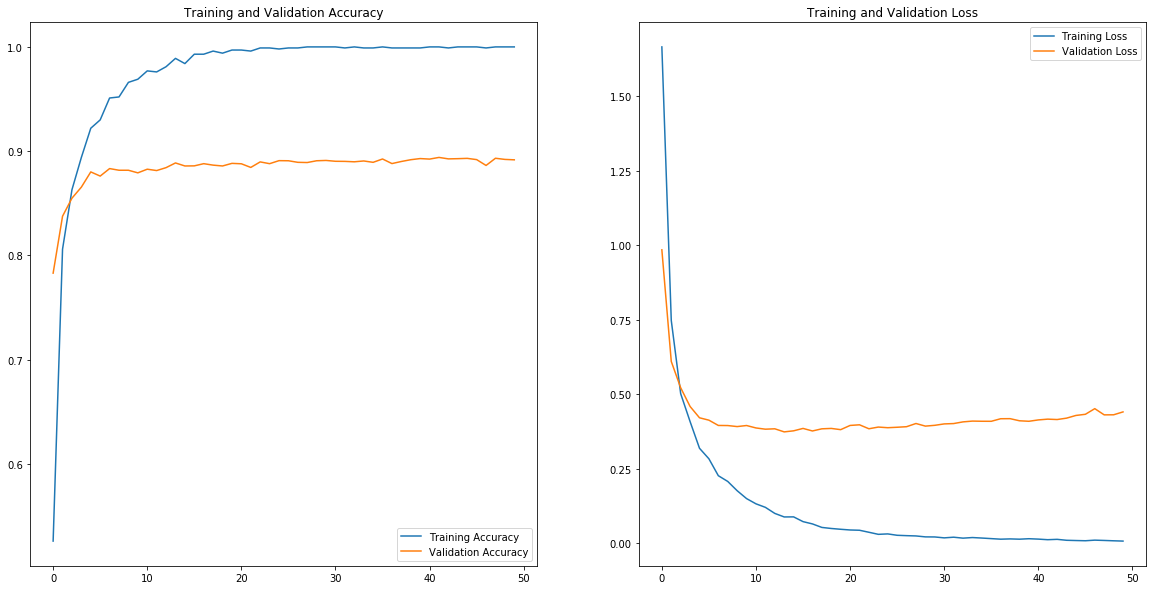

In [18]:
'''呈现训练结果'''
#在训练集和训练集上创建损失和准确率的图表
acc_1000 = history.history['accuracy']
test_acc_1000=history.history['val_accuracy']
loss_1000 = history.history['loss']
test_loss_1000 = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1000, label='Training Accuracy')
plt.plot(epochs_range, test_acc_1000, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1000, label='Training Loss')
plt.plot(epochs_range, test_loss_1000, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 7.6000数据集进行对比

In [22]:
'''模型'''
model_6000=Sequential([
    Flatten(input_shape=(28,28)), #展平
    Dense(128, activation='relu'), #全连接
    Dropout(0.2), #防止过拟合
    Dense(10, activation='softmax') #输出层，激活函数为softmax，用于输出分类结果
])

'''编译'''
model_6000.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

'''回调函数记录训练信息'''
from datetime import datetime
TIMESTAMP = "{0:%Y-%m-%dT%H-%M-%S/}".format(datetime.now())
log_dir="logs/tf/mnisthw6000" + TIMESTAMP
callback=tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1
)

'''训练'''
epochs=50
history_6000=model_6000.fit(trainX,trainy,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  callbacks=[callback]
                  )

Epoch 1/50
188/188 [==============================] - 2s 9ms/step - loss: 0.7429 - accuracy: 0.7832 - val_loss: 0.3601 - val_accuracy: 0.8989
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3258 - accuracy: 0.9067 - val_loss: 0.2839 - val_accuracy: 0.9170
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: 0.2429 - accuracy: 0.9362 - val_loss: 0.2526 - val_accuracy: 0.9248
Epoch 4/50
188/188 [==============================] - 1s 3ms/step - loss: 0.1903 - accuracy: 0.9473 - val_loss: 0.2309 - val_accuracy: 0.9335
Epoch 5/50
188/188 [==============================] - 1s 3ms/step - loss: 0.1590 - accuracy: 0.9540 - val_loss: 0.2152 - val_accuracy: 0.9365
Epoch 6/50
188/188 [==============================] - 1s 6ms/step - loss: 0.1281 - accuracy: 0.9630 - val_loss: 0.2040 - val_accuracy: 0.9383
Epoch 7/50
188/188 [==============================] - 1s 3ms/step - loss: 0.1103 - accuracy: 0.9698 - val_loss: 0.1992 - val_accuracy: 0.9410
Epoch 

### 8.6000数据集变化曲线

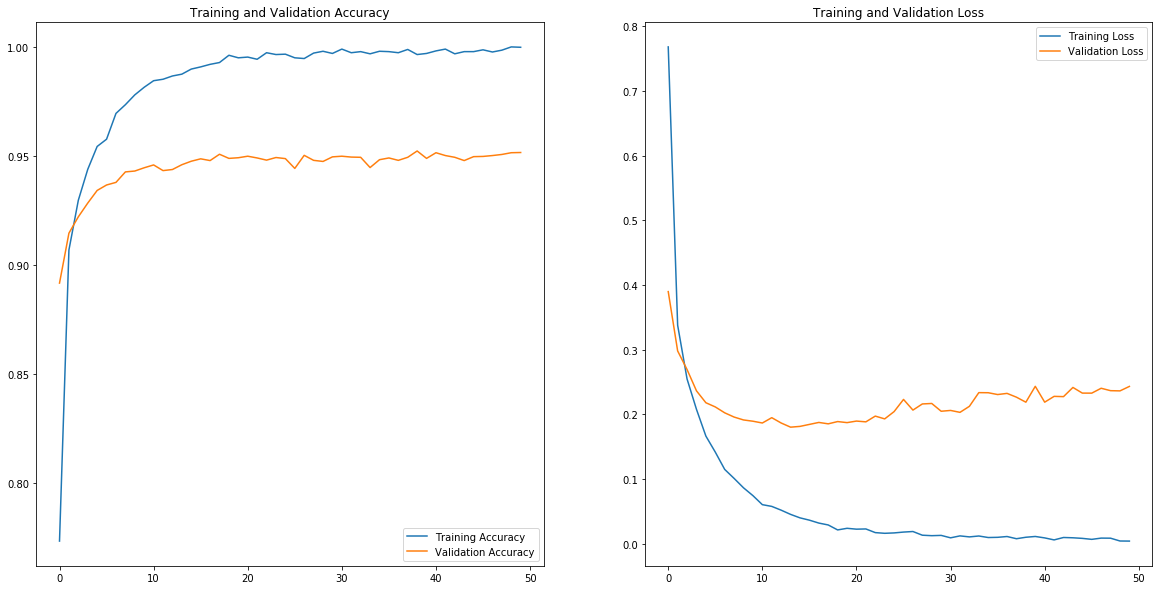

In [20]:
'''呈现训练结果'''
#在训练集和训练集上创建损失和准确率的图表
acc_6000 = history_6000.history['accuracy']
test_acc_6000=history_6000.history['val_accuracy']
loss_6000 = history_6000.history['loss']
test_loss_6000 = history_6000.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_6000, label='Training Accuracy')
plt.plot(epochs_range, test_acc_6000, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_6000, label='Training Loss')
plt.plot(epochs_range, test_loss_6000, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
'''评估'''
test_loss1, test_acc1 = model_6000.evaluate(x_test,y_test,verbose=2) #损失值和准确率
print('\nTest_6000 accuracy:', test_acc1)
print('\nTest_6000 loss:', test_loss1)

313/313 - 0s - loss: 0.2354 - accuracy: 0.9498

Test_6000 accuracy: 0.9498000144958496

Test_6000 loss: 0.23537178337574005


In [18]:
pre=model_6000.predict(x_test)
pre[0]

array([1.2555412e-13, 1.8994057e-14, 4.4355741e-10, 4.9156483e-09,
       1.1823823e-20, 3.5992194e-13, 7.0556893e-23, 1.0000000e+00,
       8.0098024e-14, 3.0591889e-13], dtype=float32)

In [20]:
pre=model_6000.predict(x_test)
class_pre=np.argmax(pre,axis=1)
class_pre

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
pre=model_6000.predict(x_test)
class_pre=np.argmax(pre,axis=1)

# 查看哪些分类正确，哪些错误
correct_indices = np.nonzero(class_pre == y_test)[0]
incorrect_indices = np.nonzero(class_pre != y_test)[0]

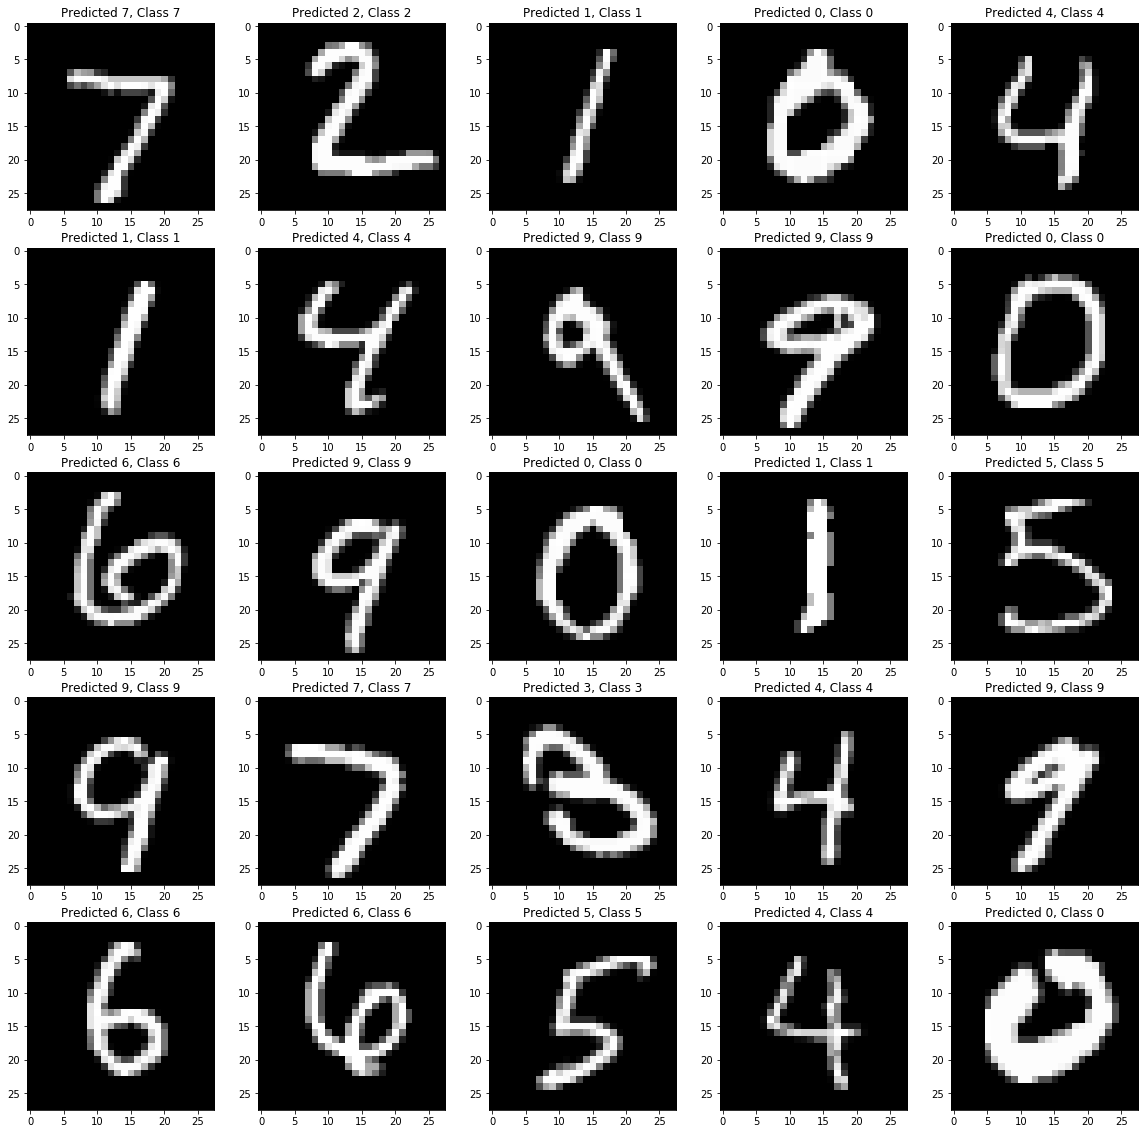

In [23]:
#分类正确的图片
plt.figure(figsize=(20,20))
for i, correct in enumerate(correct_indices[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_pre[correct], y_test[correct]))
plt.show()   

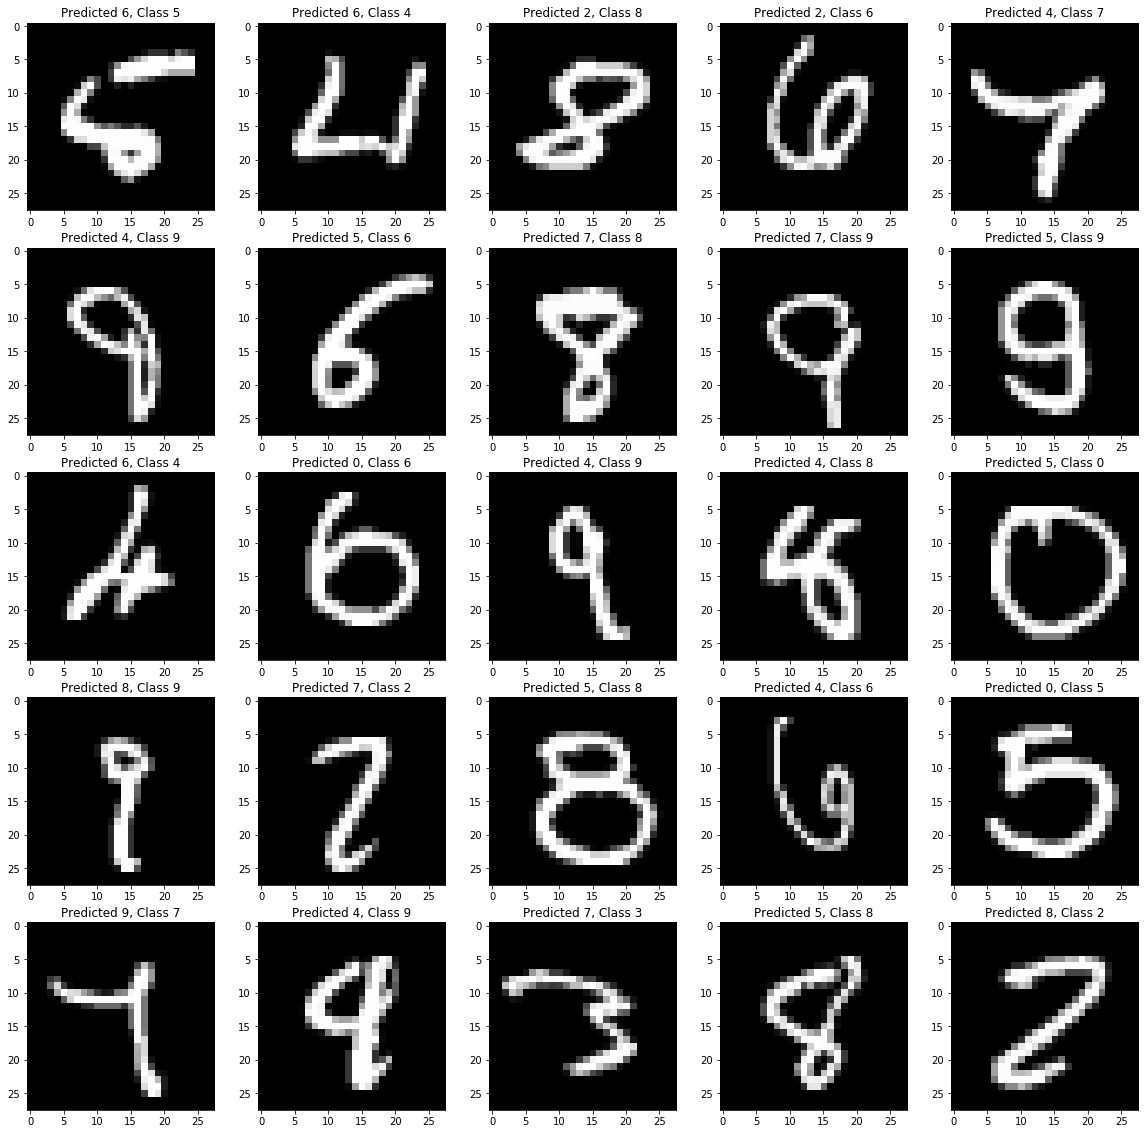

In [24]:
#分类错误的图片
plt.figure(figsize=(20,20))
for i, incorrect in enumerate(incorrect_indices[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_pre[incorrect], y_test[incorrect]))
plt.show()

### 9.结论